## CONTEXT

To analyze every tweet sent by Donald trump prior and during his Presidency to see how he used the twitter platform. We will be exploring and analyzing relevant
columns of the data. We will be applying all necessary text preprocessing steps on content column of the tweet data. Also, given that he was suspended from
twitter, we will analyze his tweets for a better understanding of his usage and activity pattern on twitter.

Data Set Information & Context:
Tweets from Donald Trump between 2009 and 2020.

- The data has got Content , Date, Nu. of Retweet, No. of Favorites, column of the tweets.
- The data has got  pre labelled sentiment(Positive and negative) column for each content of tweets.
- We will be  exploring and analyzing  relevant columns of the data.
- We will be applying all necessary text pre processing steps on content column of the tweet data.


**Steps:**
- Import necessary libraries.
- Get the data.
- Remove the column based on missing value and relevance of the column.
- Explore each column of the data.& plot the graphs and mention the observation and insights based on the outcome.
- Apply all necessary text pre processing steps on the required column.
- Plot  frequency, bar and word cloud charts based on the individual and interaction of the columns.
- Summarize the outcome from each steps, observation and insights.


### Data Description


- **id**: Unique tweet id

- **link**: Link to tweet

- **content**: Text of tweet

- **date**: Date of tweet

- **retweets**: Number of retweets

- **favorites**: Number of favorites

- **mentions**: Accounts mentioned in tweet

- **Sentiment**: Sentiment of each tweet in the content column

## Importing necessary libraries

In [1]:
import re, string, unicodedata                                         
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt                                        
import seaborn as sns                                                   
from collections import Counter                                           

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           
import nltk                                                               
from nltk.corpus import stopwords                                         
import warnings
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Ckhop\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ckhop\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Importing Dataset

In [2]:
data=pd.read_csv(r'C:\Users\Ckhop\Dropbox\My PC (LAPTOP-48O7E0E8)\Downloads\trump_tweets.csv')                             

In [3]:
data=data.copy()

## Overview of the Dataset

### View the first and last 5 rows of the dataset

In [4]:
data.head() 

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
0,0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,positive
1,1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,positive
2,2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN,positive
3,3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN,positive
4,4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN,positive


In [5]:
data.tail() 

,Unnamed: 0,id,link,content,date,retweets,favorites,mentions,hashtags,geo,Sentiment
41117,41117,1218962544372670467,https://twitter.com/realDonaldTrump/status/121...,I have never seen the Republican Party as Stro...,2020-01-19 19:24:52,32620,213817,NaN,NaN,NaN,positive
41118,41118,1219004689716412416,https://twitter.com/realDonaldTrump/status/121...,Now Mini Mike Bloomberg is critical of Jack Wi...,2020-01-19 22:12:20,36239,149571,NaN,NaN,NaN,negative
41119,41119,1219053709428248576,https://twitter.com/realDonaldTrump/status/121...,I was thrilled to be back in the Great State o...,2020-01-20 01:27:07,16588,66944,NaN,#,NaN,positive
41120,41120,1219066007731310593,https://twitter.com/realDonaldTrump/status/121...,"“In the House, the President got less due proc...",2020-01-20 02:16:00,20599,81921,@ @ @,NaN,NaN,negative
41121,41121,1219076533354037249,https://twitter.com/realDonaldTrump/status/121...,A great show! Check it out tonight at 9pm. @ F...,2020-01-20 02:57:49,7947,34902,@,NaN,NaN,positive


### Understand the shape of the dataset

In [6]:
data.shape

(41122, 11)

### Check the data types of the columns for the dataset

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,41122.0,2.056050e+04,1.187104e+04,0.000000e+00,1.028025e+04,2.056050e+04,3.084075e+04,4.112100e+04
id,41122.0,6.088909e+17,3.027946e+17,1.698309e+09,3.549428e+17,5.609149e+17,7.941218e+17,1.219077e+18
retweets,41122.0,5.455591e+03,1.013008e+04,0.000000e+00,2.500000e+01,2.910000e+02,8.778000e+03,3.098920e+05
favorites,41122.0,2.235690e+04,4.150186e+04,0.000000e+00,2.800000e+01,2.470000e+02,3.297075e+04,8.576780e+05
geo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.isnull().sum()

Unnamed: 0        0
id                0
link              0
content           0
date              0
retweets          0
favorites         0
mentions      18655
hashtags      35312
geo           41122
Sentiment         0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41122 entries, 0 to 41121
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  41122 non-null  int64  
 1   id          41122 non-null  int64  
 2   link        41122 non-null  object 
 3   content     41122 non-null  object 
 4   date        41122 non-null  object 
 5   retweets    41122 non-null  int64  
 6   favorites   41122 non-null  int64  
 7   mentions    22467 non-null  object 
 8   hashtags    5810 non-null   object 
 9   geo         0 non-null      float64
 10  Sentiment   41122 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 3.5+ MB


### Missing Value analysis

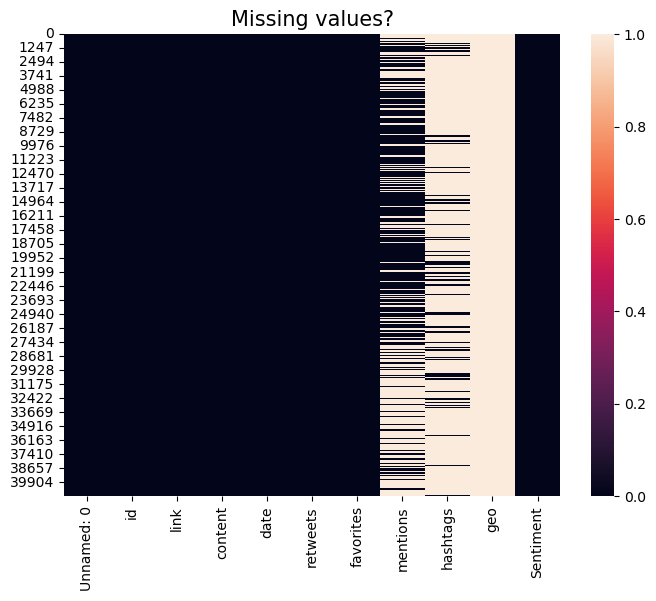

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data.isnull())                              
plt.title("Missing values?", fontsize = 15)
plt.show()

### From the above heatmap for missing values we can conlude the following:

1. For variable 'mentions' there are significant number of values that are missing (18655).
2. For varibale 'hashtags' 35312 values are missing, more than 'mentions'.
3. The variable 'geo' is totaly empty i.e. all 41122 rows of 'geo' are missing.

Thus it would be best to drop these features as they won't be contributing for our Text Analysis.

In [11]:
data.isna().sum()

Unnamed: 0        0
id                0
link              0
content           0
date              0
retweets          0
favorites         0
mentions      18655
hashtags      35312
geo           41122
Sentiment         0
dtype: int64

 * Geo column has got all values as nulls, hashtags have too many null values, mentions also have too many null values.

The below function, will give these output in Dataframe

- **Zero Values**
- **Missing Values**
- **% of Total Values**
- **Total Zero Missing Values**
- **% Total Zero Missing Values**
- **Data Type**

In [12]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                            
        mis_val = df.isnull().sum()                                                               
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                       
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                         
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})               
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']  
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df) 
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                     
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
    
        return mz_table

In [13]:
missing_zero_values_table(data)

Your selected dataframe has 11 columns and 41122 Rows.
There are 3 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
geo,0,41122,100.0,41122,100.0,float64
hashtags,0,35312,85.9,35312,85.9,object
mentions,0,18655,45.4,18655,45.4,object


In [14]:
data.drop(['Unnamed: 0', 'id','link','mentions','hashtags','geo'],axis=1,inplace=True)
data.shape

(41122, 5)

In [15]:
data.dtypes

content      object
date         object
retweets      int64
favorites     int64
Sentiment    object
dtype: object

In [16]:
import pandas as pd

data['date'] = pd.to_datetime(data['date'], errors='coerce')
print("Number of NaT values in 'date' column:")
print(data['date'].isna().sum())

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

print(data.head(10))

Number of NaT values in 'date' column:
0
                                             content                date  \
0  Be sure to tune in and watch Donald Trump on L... 2009-05-04 20:54:25   
1  Donald Trump will be appearing on The View tom... 2009-05-05 03:00:10   
2  Donald Trump reads Top Ten Financial Tips on L... 2009-05-08 15:38:08   
3  New Blog Post: Celebrity Apprentice Finale and... 2009-05-08 22:40:15   
4  "My persona will never be that of a wallflower... 2009-05-12 16:07:28   
5  Miss USA Tara Conner will not be fired - "I've... 2009-05-12 21:21:55   
6  Listen to an interview with Donald Trump discu... 2009-05-13 19:38:28   
7  "Strive for wholeness and keep your sense of w... 2009-05-14 18:30:40   
8  Enter the "Think Like A Champion" signed book ... 2009-05-15 16:13:13   
9  "When the achiever achieves, it's not a platea... 2009-05-17 00:22:45   

   retweets  favorites Sentiment  year  month  day  hour  
0       500        868  positive  2009      5    4    20  
1   

In [17]:
data.dtypes

content              object
date         datetime64[ns]
retweets              int64
favorites             int64
Sentiment            object
year                  int32
month                 int32
day                   int32
hour                  int32
dtype: object

#### Most liked tweet during Presidential year

In [18]:
president_date = data[(data['year'] >= 2017) & (data['month'] > 1)]
most_favorites_index = president_date['favorites'].idxmax()

most_favorites_tweet = president_date.loc[most_favorites_index, 'content']
most_favorites_year = president_date.loc[most_favorites_index, 'year']

print(most_favorites_tweet)  
print('-'*126)
print(most_favorites_year)   

A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
------------------------------------------------------------------------------------------------------------------------------
2019


#### Most retweeted tweet during presidential year

In [19]:
import pandas as pd
president_date = data[(data['year'] >= 2017) & (data['month'] > 1)]

most_retweeted_index = president_date['retweets'].idxmax()
most_retweeted_tweet = president_date.loc[most_retweeted_index]['content']
most_retweeted_year = president_date.loc[most_retweeted_index]['year']

print("Most retweeted tweet: ", most_retweeted_tweet) 
print('-'*126)
print("Year of the most retweeted tweet: ", most_retweeted_year)  

Most retweeted tweet:  # FraudNewsCNN # FNNpic.twitter.com/WYUnHjjUjg
------------------------------------------------------------------------------------------------------------------------------
Year of the most retweeted tweet:  2017


### Number of characters in tweets

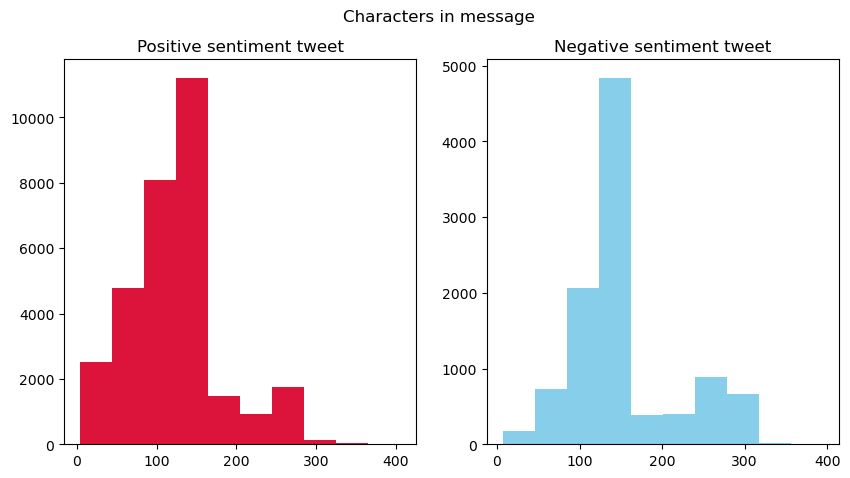

In [20]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

tweet_len = data[data['Sentiment'] == 'positive']['content'].str.len()
ax1.hist(tweet_len, color='crimson')
ax1.set_title('Positive sentiment tweet')

tweet_len = data[data['Sentiment'] == 'negative']['content'].str.len()
ax2.hist(tweet_len, color='skyblue')
ax2.set_title('Negative sentiment tweet')

fig.suptitle('Characters in message')

plt.show()


In [21]:
print(data.Sentiment.value_counts())

Sentiment
positive    30940
negative    10182
Name: count, dtype: int64


### From the above histograms for the characters in messages for both 'Positive' and 'Negative' sentiment tweet we can conclude the following:

Positive Sentiment Tweets:

1. From the above histogram we can clearly see that, the majority i.e. 10,000 or more Positive sentiment tweets have 100 characters or above though there is a significant drop off of no. of tweets if tweet has more than 150 characters and there are tweets that have above 250 characters but they are less than 2000 in numbers.

Negative Sentiment Tweets:

2. From the above histogram we can clearly see that, the majority i.e. 4000 or above Negative sentiment tweets have 100 characters or above though there is a significant drop off of no. of tweets if tweet has more than 150 characters there are tweets that have above 250 characters but they are less than 1000 in numbers.


Given that there are more 'Positive' sentiment tweets (30940) than 'Negative' sentiment tweets (10182) in the dataset. There are few number of tweets with 'Positive' Sentiment having 300 characters or above. Meanwhile the number of 'Negative' sentiment tweets having 300 or more characters are significantly higher than tweets with postive sentiment.

Thus we can conclude that Donald .J. Trump spent more time writing negative tweets and used more characters to express something negative, than he did with positive sentiment tweets.

### Number of words in a tweet

Text(0.5, 0.98, 'Words in a tweet')

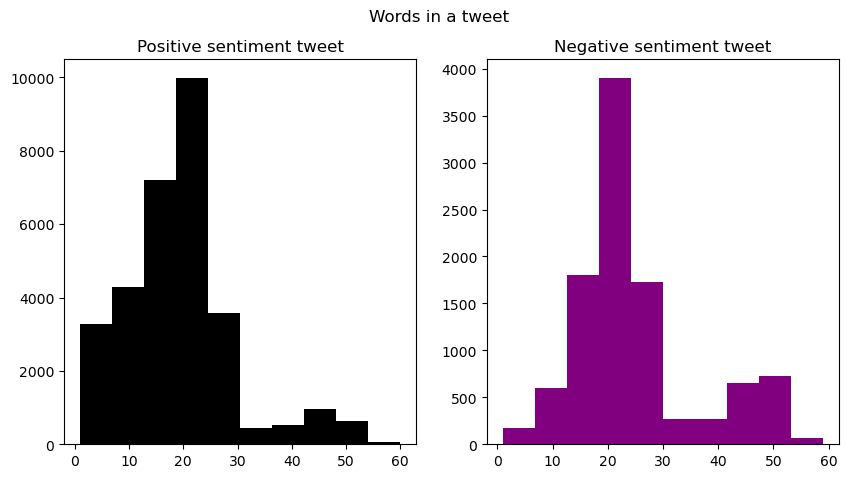

In [22]:
import matplotlib.pyplot as plt

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
tweet_len = data[data['Sentiment']=='positive']['content'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black')
ax1.set_title('Positive sentiment tweet')

tweet_len = data[data['Sentiment']=='negative']['content'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple')
ax2.set_title('Negative sentiment tweet')
fig.suptitle('Words in a tweet')

### From above histograms for number of words in Positive and Negative sentiment tweets we can conclude the following:

Positive Sentiment Tweets:

1. From the above histogram we can clearly see that about 10,000 tweets have  appox. 18 or above words. Though there is a significant drop off of number of tweets having  appox. 24 words or above. There are very few tweets with 50 words or above.

Negative Sentiment Tweets:

1. From the above histogram we can clearly see that above 3500 just and jsut below 4000 are the tweets with 18 or more words. Though there is a significant drop off of number of tweets having approx. 24 words or above. There are some tweets with 50 words or above.

Given that there are more 'Positive' sentiment tweets (30940) than 'Negative' sentiment tweets (10182) in the dataset. There are few number of tweets with 'Positive' Sentiment having 50 words or above. Meanwhile the number of 'Negative' sentiment tweets having 50 words or above are significantly higher than tweets with postive sentiment. Though in both cases tweets with 60 words or above are very few.

Thus we can conclude that Donald .J. Trump spent more time writing negative tweets and used mo wordsrs to expresnegative sentimentsve, than he did with positive sentiment tweets.

#### Most active hour on twitter

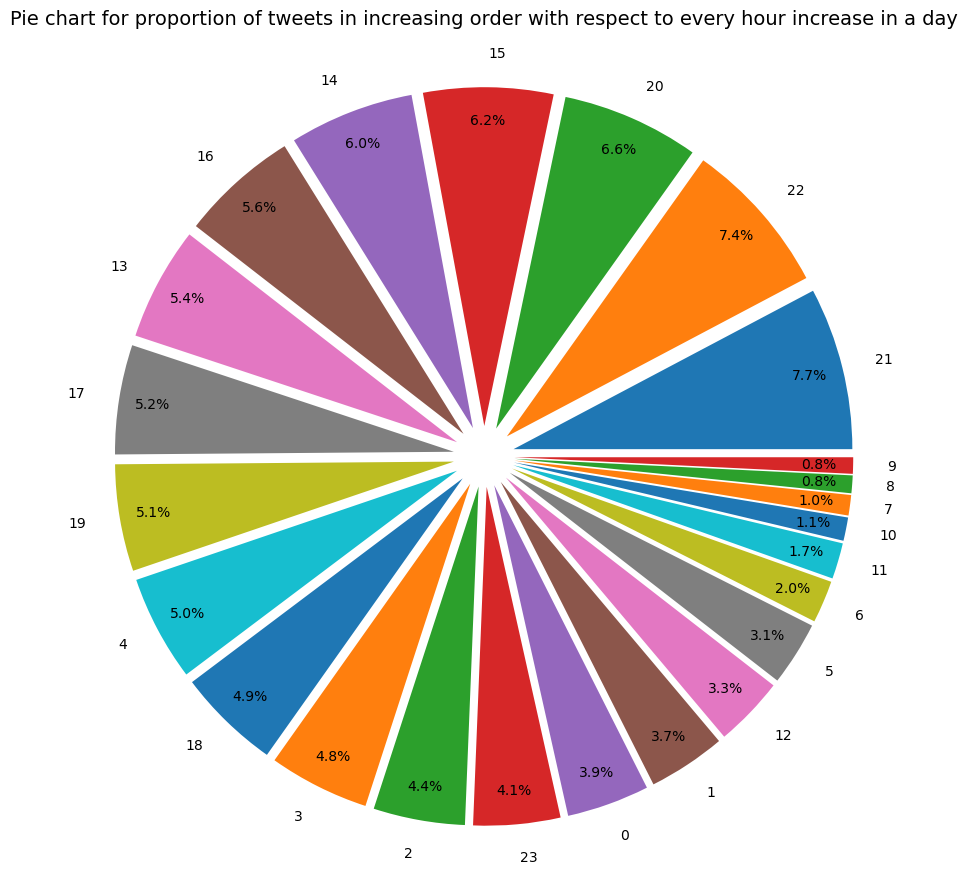

In [23]:
Category=data['hour'].value_counts()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Pie chart for proportion of tweets in increasing order with respect to every hour increase in a day", fontsize=14);
#pie.savefig("DeliveryPieChart.png")

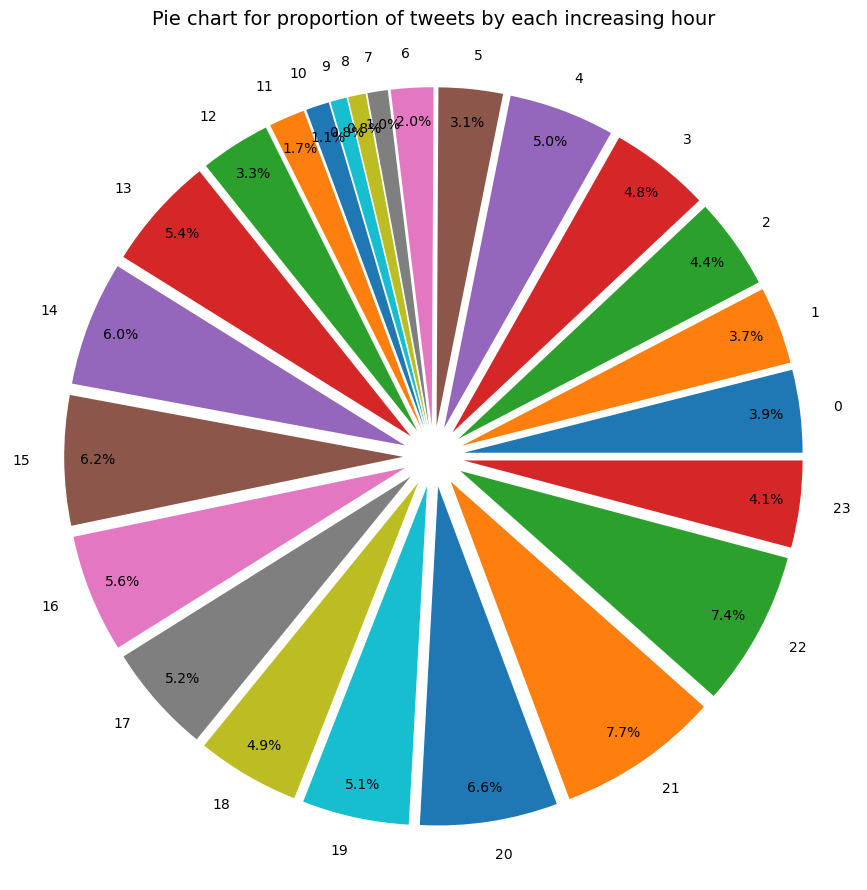

In [24]:
Category=data['hour'].value_counts().sort_index()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Pie chart for proportion of tweets by each increasing hour", fontsize=14);

### From above piechart we can conclude the following:

The above piechart shows the distribution of no. of tweets per each our of the day:

1. Most number of tweets belongs to 21st hour (i.e. 9:00 PM), which means that Donald .J. Trump tweeted the most around 9:00 PM. 
   
2. Least number of tweets belongs to 9th hour (i.e. 9:00 AM), which means that Donald .J. Trump tweeted the least around 9:00 AM. 


The rate of number of tweets is the least in range of time from 6:00 AM to 11:00 AM in morning which is less than 2%. Then it picks up after 11:00 AM and at 15th hour i.e. around 3:00 PM it reaches the pick and then again drops off for 16th, 17th and 18th hour (i.e. 4:00 PM, 5:00 PM and 6:00 PM respectively). 

Then again there is increase after 6:00 PM and the proportion of number of tweets can be seen getting increased in piechart. Reaches the maximum pick that we've seen for the data around 9:00 PM. and then drops off after that. Then again in range of time from 2:00 AM to 4:00 AM there is increase in proportion of number of tweets. 

Thus Donald .J. Trump was active on twitter mostly after 6:00 PM and in midnight and was least active in morning.

#### Number of tweet, retweet, favorite per Year

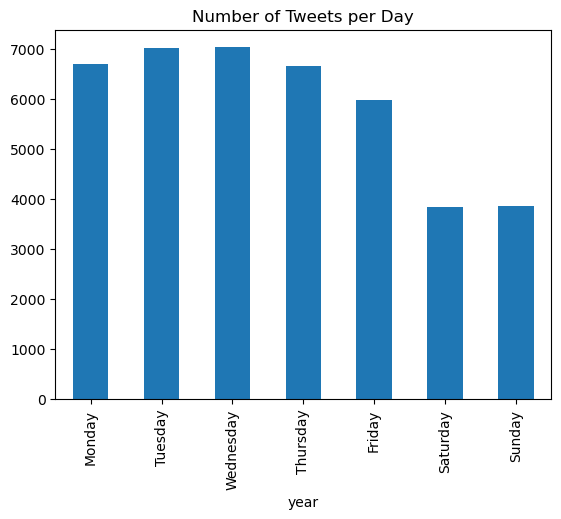

In [25]:
data['date'] = pd.to_datetime(data['date']) 
plt.figsize = (15,10)

plt.title("Number of Tweets per Day")
tweet_cpt = data["date"].groupby(data["date"].dt.day_name()).count()
tweet_cpt.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]).plot(kind="bar")    #Assigning each day of the week as index
plt.xlabel("year")
plt.show()

### From the above barplot for number of tweets on each day of the week, we can conclude the following:

Donald Trump tweeted the most on 'Tuesday' and 'Wednesday', though the activity is slightly a bit more on 'Wednesday'. Meanwhile the number of tweets are the least on 'Saturday' and 'Sunday'.

Tweeting starts to increase from weekend and then hits pick on 'Wednesday' and then drops off after that. Thus we can conlude that he tweeted more frequently on early working days i.e. Monday to Thursday the most.

<Axes: xlabel='Sentiment', ylabel='favorites'>

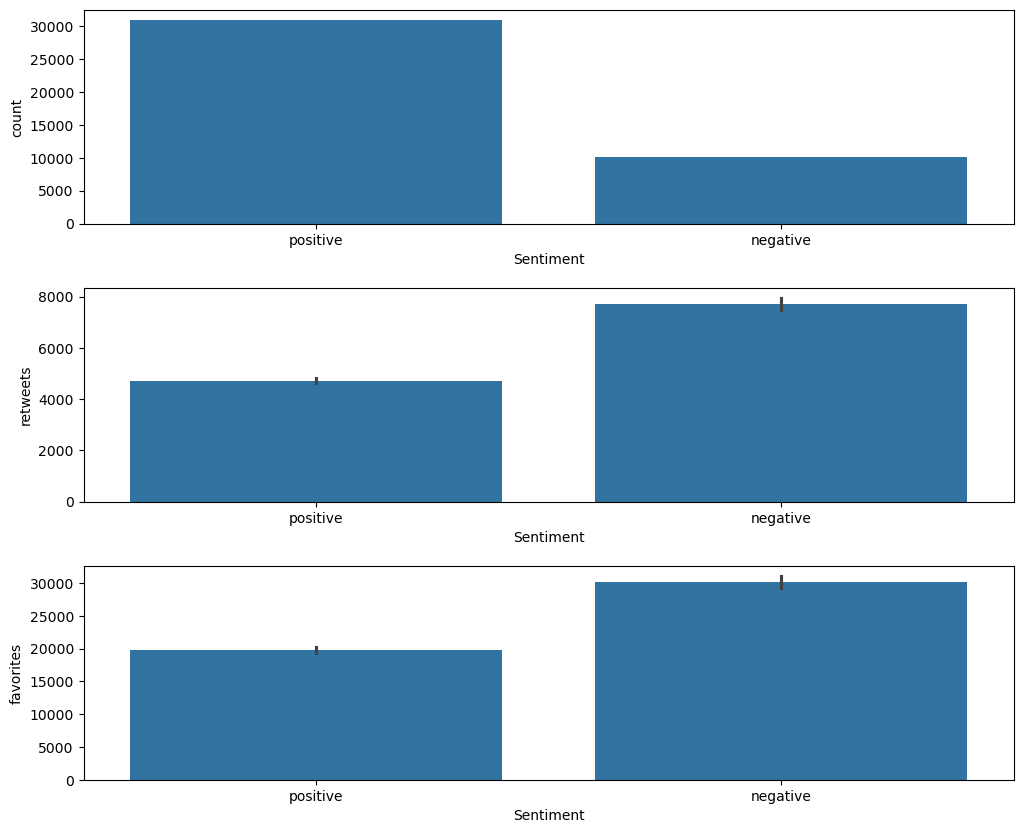

In [26]:
fig, ax = plt.subplots(3,1,figsize=(12,10))
plt.subplots_adjust(hspace=0.3)
sns.countplot(x='Sentiment', data=data, ax=ax[0])
sns.barplot(x='Sentiment', y='retweets', data=data, ax=ax[1])
sns.barplot(x='Sentiment', y='favorites', data=data, ax=ax[2])

### From the above barplots we can conclude the following:

1. There are 30940 Positive sentiment tweets in the dataset.
2. There are 10182 Negative sentiment tweets in the dataset.

3. The number of retweets for tweets with negative sentiments are way higher than the retweets for positive sentiments. Which indicates that followers of trump/people engaged more with negative sentiment tweets than the positive ones.

4. The number of favorites for tweets with negative sentiments are way higher then those with positive sentiments, again suggesting that people enaged more with negative sentimental tweets than ones with positive sentiments.

In [27]:
data.head()

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


### Text Preprocessing - removal of http links

In [28]:
data['content'] = data['content'].apply(lambda x: re.sub(r"http\S+", "", x))

print(data.head())

                                             content                date  \
0  Be sure to tune in and watch Donald Trump on L... 2009-05-04 20:54:25   
1  Donald Trump will be appearing on The View tom... 2009-05-05 03:00:10   
2  Donald Trump reads Top Ten Financial Tips on L... 2009-05-08 15:38:08   
3  New Blog Post: Celebrity Apprentice Finale and... 2009-05-08 22:40:15   
4  "My persona will never be that of a wallflower... 2009-05-12 16:07:28   

   retweets  favorites Sentiment  year  month  day  hour  
0       500        868  positive  2009      5    4    20  
1        33        273  positive  2009      5    5     3  
2        12         18  positive  2009      5    8    15  
3        11         24  positive  2009      5    8    22  
4      1399       1965  positive  2009      5   12    16  


In [29]:
import contractions

#### Pre processing: De-contraction of words

In [30]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

for i, row in data.iterrows():
    content = data.at[i, 'content']
    clean_content = replace_contractions(content)
    data.at[i,'content'] = clean_content
data.head()

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ckhop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Pre Processing : Removal of number

In [32]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['content'] = data['content'].apply(lambda x: remove_numbers(x))
data.head()

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


### Pre Processing - Tokenization

In [33]:
data['content'] = data.apply(lambda row: nltk.word_tokenize(row['content']), axis=1) 
data.head()

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,"[Be, sure, to, tune, in, and, watch, Donald, T...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[Donald, Trump, will, be, appearing, on, The, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[Donald, Trump, reads, Top, Ten, Financial, Ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[New, Blog, Post, :, Celebrity, Apprentice, Fi...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[``, My, persona, will, never, be, that, of, a...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16


#### Remove non-ascii character

In [34]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        
    return new_words

### Preprocessing-Lowercase

- Lowercasing ALL your text data, although commonly overlooked, is one of the simplest and most effective form of text preprocessing. It is applicable to most text mining and NLP problems and can help in cases where your dataset is not very large and significantly helps with consistency of expected output.

- An example where lowercasing is very useful is for search. Imagine, you are looking for documents containing “usa”. However, no results were showing up because “usa” was indexed as “USA”.

In [35]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        
    for word in words:
        new_word = word.lower()           
        new_words.append(new_word)        
    return new_words

In [36]:
data['content'] = data['content'].apply(lambda x: to_lowercase(x))
data.head(20)

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,"[be, sure, to, tune, in, and, watch, donald, t...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, will, be, appearing, on, the, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, :, celebrity, apprentice, fi...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[``, my, persona, will, never, be, that, of, a...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16
5,"[miss, usa, tara, conner, will, not, be, fired...",2009-05-12 21:21:55,27,26,positive,2009,5,12,21
6,"[listen, to, an, interview, with, donald, trum...",2009-05-13 19:38:28,14,16,positive,2009,5,13,19
7,"[``, strive, for, wholeness, and, keep, your, ...",2009-05-14 18:30:40,18,25,positive,2009,5,14,18
8,"[enter, the, ``, think, like, a, champion, '',...",2009-05-15 16:13:13,14,8,positive,2009,5,15,16
9,"[``, when, the, achiever, achieves, ,, it, is,...",2009-05-17 00:22:45,20,48,positive,2009,5,17,0


## Preprocessing: Removal of Punctuation

In [37]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    
    return new_words

In [38]:
data['content'] = data['content'].apply(lambda x: remove_punctuation(x))
data.head(20)

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,"[be, sure, to, tune, in, and, watch, donald, t...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, will, be, appearing, on, the, ...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, celebrity, apprentice, final...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[my, persona, will, never, be, that, of, a, wa...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16
5,"[miss, usa, tara, conner, will, not, be, fired...",2009-05-12 21:21:55,27,26,positive,2009,5,12,21
6,"[listen, to, an, interview, with, donald, trum...",2009-05-13 19:38:28,14,16,positive,2009,5,13,19
7,"[strive, for, wholeness, and, keep, your, sens...",2009-05-14 18:30:40,18,25,positive,2009,5,14,18
8,"[enter, the, think, like, a, champion, signed,...",2009-05-15 16:13:13,14,8,positive,2009,5,15,16
9,"[when, the, achiever, achieves, it, is, not, a...",2009-05-17 00:22:45,20,48,positive,2009,5,17,0


### Pre-Processing - Removal of stopwords

- Stop words are a set of commonly used words in a language.

- Examples of stop words in English are “a”, “the”, “is”, “are” and etc. The intuition behind using stop words is that, by removing low information words from text, we can focus on the important words instead.

In [39]:
import nltk
nltk.download('stopwords')      

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ckhop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
stopwords = nltk.corpus.stopwords.words('english')

In [41]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        
    for word in words:
        if word not in stopwords:
            new_words.append(word)        
    return new_words

In [42]:
data['content'] = data['content'].apply(lambda x: remove_stopwords(x))
data.head(20)

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,"[sure, tune, watch, donald, trump, late, night...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, appearing, view, tomorrow, mor...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, reads, top, ten, financial, ti...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, celebrity, apprentice, final...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[persona, never, wallflower, would, rather, bu...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16
5,"[miss, usa, tara, conner, fired, always, belie...",2009-05-12 21:21:55,27,26,positive,2009,5,12,21
6,"[listen, interview, donald, trump, discussing,...",2009-05-13 19:38:28,14,16,positive,2009,5,13,19
7,"[strive, wholeness, keep, sense, wonder, intac...",2009-05-14 18:30:40,18,25,positive,2009,5,14,18
8,"[enter, think, like, champion, signed, book, k...",2009-05-15 16:13:13,14,8,positive,2009,5,15,16
9,"[achiever, achieves, plateau, beginning, donal...",2009-05-17 00:22:45,20,48,positive,2009,5,17,0


#### Pre-Processing: Lemmatization

- Lemmatization on the surface is very similar to stemming, where the goal is to remove inflections and map a word to its root form.

- The only difference is that, lemmatization tries to do it the proper way. It doesn’t just chop things off, it actually transforms words to the actual root. For example, the word “better” would map to “good”.

In [43]:
from nltk.stem.wordnet import WordNetLemmatizer        

In [44]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ckhop\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [45]:
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word))
    return new_words

data['content'] = data['content'].apply(lambda x: lemmatize_list(x))
data.head(20)

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,"[sure, tune, watch, donald, trump, late, night...",2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,"[donald, trump, appearing, view, tomorrow, mor...",2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,"[donald, trump, read, top, ten, financial, tip...",2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,"[new, blog, post, celebrity, apprentice, final...",2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,"[persona, never, wallflower, would, rather, bu...",2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16
5,"[miss, usa, tara, conner, fired, always, belie...",2009-05-12 21:21:55,27,26,positive,2009,5,12,21
6,"[listen, interview, donald, trump, discussing,...",2009-05-13 19:38:28,14,16,positive,2009,5,13,19
7,"[strive, wholeness, keep, sense, wonder, intac...",2009-05-14 18:30:40,18,25,positive,2009,5,14,18
8,"[enter, think, like, champion, signed, book, k...",2009-05-15 16:13:13,14,8,positive,2009,5,15,16
9,"[achiever, achieves, plateau, beginning, donal...",2009-05-17 00:22:45,20,48,positive,2009,5,17,0


#### Text preprocessing-Normalization(aggregating pre-processing function into one)

In [46]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['content'] = data.apply(lambda row: normalize(row['content']), axis=1)
data.head(20)

,content,date,retweets,favorites,Sentiment,year,month,day,hour
0,sure tune watch donald trump late night david ...,2009-05-04 20:54:25,500,868,positive,2009,5,4,20
1,donald trump appearing view tomorrow morning d...,2009-05-05 03:00:10,33,273,positive,2009,5,5,3
2,donald trump read top ten financial tip late s...,2009-05-08 15:38:08,12,18,positive,2009,5,8,15
3,new blog post celebrity apprentice finale less...,2009-05-08 22:40:15,11,24,positive,2009,5,8,22
4,persona never wallflower would rather build wa...,2009-05-12 16:07:28,1399,1965,positive,2009,5,12,16
5,miss usa tara conner fired always believer sec...,2009-05-12 21:21:55,27,26,positive,2009,5,12,21
6,listen interview donald trump discussing new b...,2009-05-13 19:38:28,14,16,positive,2009,5,13,19
7,strive wholeness keep sense wonder intact dona...,2009-05-14 18:30:40,18,25,positive,2009,5,14,18
8,enter think like champion signed book keychain...,2009-05-15 16:13:13,14,8,positive,2009,5,15,16
9,achiever achieves plateau beginning donald j t...,2009-05-17 00:22:45,20,48,positive,2009,5,17,0


###  Most common words in the positive and negative Sentiments tweets

In [47]:
Positive_sent = data[data['Sentiment']=='positive']
Negative_sent = data[data['Sentiment']=='negative']


In [48]:
print('Number of tweets with positive sentiment', Positive_sent['Sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['Sentiment'].count())

Number of tweets with positive sentiment 30940
Number of tweets with negative sentiment 10182


### Wordcloud

In [49]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['content'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

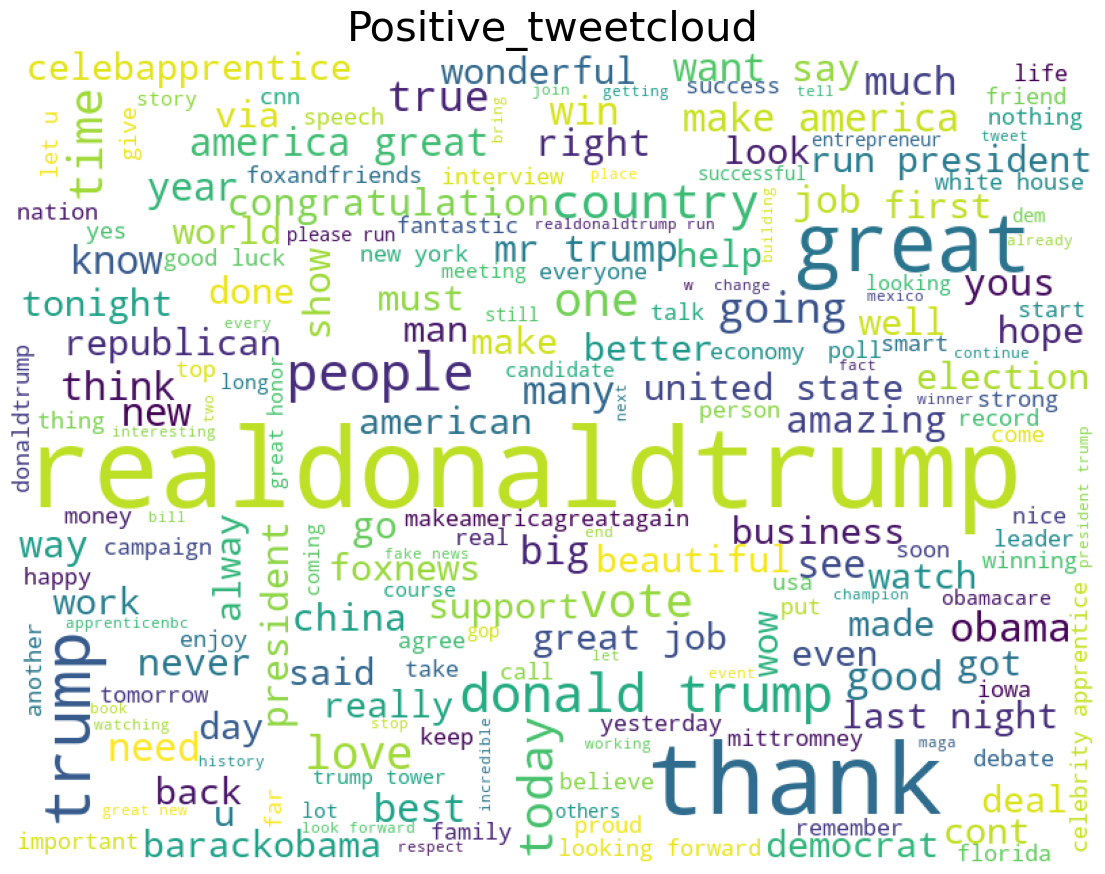

In [50]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")

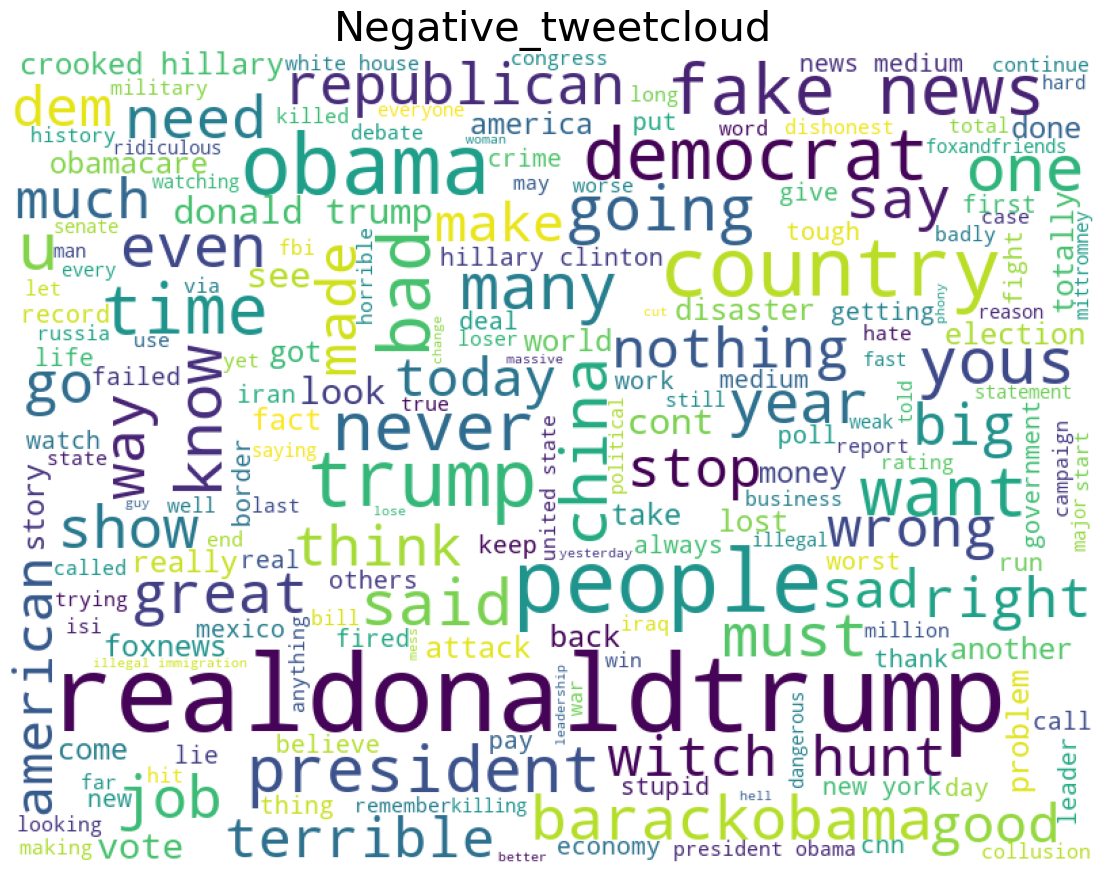

In [51]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")

### Insights



Donald .J. Trump seems like a person that tweeted alot before his ban especially during his presidency. He tweeted alot about state of the country, comments about foreign countries, about his political opponents and what he's gonna do or did about the policy or the decisions he took. He was part a show 'The Apprentice'.

From 'Positive tweetcloud' wordcloud, we can see words like 'republican' (political party from which he ran), 'foxnews' (a private news network which aligns gernerally on right-wing side of the political spectrum on which donald trump aligns too), 'foxandfreinds' (a show airing on fox news favouring donald trump). Thus it seems that he's talking/tweeting positively about those that show him in a positive light.

From 'Negative tweetcloud' wordcloud, we can see words like 'democrat' (a rival political party to the donald trump's political party republican), 'fake news' (donald trumps way of saying that any news that does not fit his narrative is fake), 'china' (during his presidency he criticised china alot about their tarrifs and on other positions), 'barackobama' (donald trump succeded barack obama as a president, so during and before his presedency he critised obama on number of issues). Thus he had negative sentiments about anything that did not agree with him or favoured him or anything against his opposition.

He's negative sentiment tweets got more attraction than the positive sentiment tweets as we've seen with number of 'favorites' and 'retweets' that he's negative tweets got compared positives ones. It's interesting that he tweeted even at midnight especially around 2:00 AM to 4:00 AM he tweeted alot. 